### **Q1**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/data_for_exam.xlsx - Sheet1.csv')

df.head()

,Date received,Product,Sub-product,Consumer complaint narrative,Company public response,Company,State,ZIP code,Submitted via,Company response to consumer,Timely response?,Consumer disputed?
0,3/12/2014,Mortgage,Other mortgage,NaN,NaN,M&T BANK CORPORATION,MI,48382,Referral,Closed with explanation,Yes,No
1,1/19/2017,Student loan,Federal student loan servicing,When my loan was switched over to Navient i wa...,NaN,"Navient Solutions, LLC.",LA,NaN,Web,Closed with explanation,Yes,No
2,4/6/2018,Credit card or prepaid card,General-purpose credit card or charge card,I tried to sign up for a spending monitoring p...,NaN,CAPITAL ONE FINANCIAL CORPORATION,VA,NaN,Web,Closed with explanation,Yes,NaN
3,6/8/2014,Credit card,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Web,Closed with explanation,Yes,Yes
4,9/13/2014,Debt collection,Credit card,NaN,NaN,"CITIBANK, N.A.",VA,23233,Web,Closed with explanation,Yes,Yes


In [ ]:
print(df.shape)
df.info()

(99, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Date received                 99 non-null     object
 1   Product                       99 non-null     object
 2   Sub-product                   86 non-null     object
 3   Consumer complaint narrative  16 non-null     object
 4   Company public response       33 non-null     object
 5   Company                       99 non-null     object
 6   State                         98 non-null     object
 7   ZIP code                      89 non-null     object
 8   Submitted via                 99 non-null     object
 9   Company response to consumer  99 non-null     object
 10  Timely response?              99 non-null     object
 11  Consumer disputed?            75 non-null     object
dtypes: object(12)
memory usage: 9.4+ KB


In [ ]:
df = df.drop('Sub-product',axis=1)
df.shape

(99, 11)

In [ ]:
df['Consumer disputed?'].value_counts()

No     56
Yes    19
Name: Consumer disputed?, dtype: int64

In [ ]:
df = df[df['Consumer disputed?'].notna()]
df.shape

(75, 11)

In [ ]:
df['Consumer disputed?'] = np.where(df['Consumer disputed?']== 'Yes', 1, 0)
df['Consumer disputed?'].value_counts()

0    56
1    19
Name: Consumer disputed?, dtype: int64

In [ ]:
column_list = [a for a in df]
# Column Name , Unique Value , Count of Nulls

for col in df.select_dtypes(['object']).columns:
    print(col,':',df[col].nunique(),':',df[col].isna().sum())

Date received : 74 : 0
Product : 8 : 0
Consumer complaint narrative : 5 : 70
Company public response : 4 : 56
Company : 41 : 0
State : 31 : 0
ZIP code : 73 : 2
Submitted via : 5 : 0
Company response to consumer : 5 : 0
Timely response? : 1 : 0


In [ ]:
df.replace("?", np.nan, inplace = True)
df.head(5)

,Date received,Product,Consumer complaint narrative,Company public response,Company,State,ZIP code,Submitted via,Company response to consumer,Timely response?,Consumer disputed?
0,3/12/2014,Mortgage,NaN,NaN,M&T BANK CORPORATION,MI,48382,Referral,Closed with explanation,Yes,0
1,1/19/2017,Student loan,When my loan was switched over to Navient i wa...,NaN,"Navient Solutions, LLC.",LA,NaN,Web,Closed with explanation,Yes,0
3,6/8/2014,Credit card,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Web,Closed with explanation,Yes,1
4,9/13/2014,Debt collection,NaN,NaN,"CITIBANK, N.A.",VA,23233,Web,Closed with explanation,Yes,1
5,11/13/2013,Mortgage,NaN,NaN,U.S. BANCORP,MN,48322,Phone,Closed with monetary relief,Yes,0


In [ ]:
missing_data = df.isnull()
missing_data.head(5)

,Date received,Product,Consumer complaint narrative,Company public response,Company,State,ZIP code,Submitted via,Company response to consumer,Timely response?,Consumer disputed?
0,False,False,True,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,True,False,False,False,False
3,False,False,True,True,False,False,False,False,False,False,False
4,False,False,True,True,False,False,False,False,False,False,False
5,False,False,True,True,False,False,False,False,False,False,False


In [ ]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Date received
False    75
Name: Date received, dtype: int64

Product
False    75
Name: Product, dtype: int64

Consumer complaint narrative
True     70
False     5
Name: Consumer complaint narrative, dtype: int64

Company public response
True     56
False    19
Name: Company public response, dtype: int64

Company
False    75
Name: Company, dtype: int64

State
False    75
Name: State, dtype: int64

ZIP code
False    73
True      2
Name: ZIP code, dtype: int64

Submitted via
False    75
Name: Submitted via, dtype: int64

Company response to consumer
False    75
Name: Company response to consumer, dtype: int64

Timely response?
False    75
Name: Timely response?, dtype: int64

Consumer disputed?
False    75
Name: Consumer disputed?, dtype: int64



In [ ]:
columns_to_drop = ["Consumer complaint narrative", "Company public response", "ZIP code"]
df_cleaned = df.drop(columns=columns_to_drop)

In [ ]:
# Drop irrelevant columns
columns_to_drop = ['Company public response', 'Submitted via', 'Company response to consumer', 'Timely response?', 'Consumer disputed?']
df = df.drop(columns=columns_to_drop)

# Drop rows with missing Consumer complaint narrative
df = df.dropna(subset=['Consumer complaint narrative'])

# Convert 'Date received' column to datetime format
df['Date received'] = pd.to_datetime(df['Date received'])

# Extract year and month from 'Date received'
df['Year'] = df['Date received'].dt.year
df['Month'] = df['Date received'].dt.month

In [ ]:
# Perform text preprocessing on 'Consumer complaint narrative'
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    words = word_tokenize(text)  # Tokenize text
    words = [word for word in words if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(words)

df['Cleaned narrative'] = df['Consumer complaint narrative'].apply(preprocess_text)

# Group by Year and Month, count complaints, and show top words
grouped = df.groupby(['Year', 'Month']).size().reset_index(name='Complaints Count')
print(grouped)

# Save the refined data
df.to_csv('refined_consumer_complaints.csv', index=False)


   Year  Month  Complaints Count
0  2016      7                 1
1  2016      9                 1
2  2016     11                 1
3  2017      1                 1
4  2017      4                 1


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


***Q2***

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/data_for_exam.xlsx - Sheet1.csv")
df.head()

,Date received,Product,Sub-product,Consumer complaint narrative,Company public response,Company,State,ZIP code,Submitted via,Company response to consumer,Timely response?,Consumer disputed?
0,3/12/2014,Mortgage,Other mortgage,NaN,NaN,M&T BANK CORPORATION,MI,48382,Referral,Closed with explanation,Yes,No
1,1/19/2017,Student loan,Federal student loan servicing,When my loan was switched over to Navient i wa...,NaN,"Navient Solutions, LLC.",LA,NaN,Web,Closed with explanation,Yes,No
2,4/6/2018,Credit card or prepaid card,General-purpose credit card or charge card,I tried to sign up for a spending monitoring p...,NaN,CAPITAL ONE FINANCIAL CORPORATION,VA,NaN,Web,Closed with explanation,Yes,NaN
3,6/8/2014,Credit card,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Web,Closed with explanation,Yes,Yes
4,9/13/2014,Debt collection,Credit card,NaN,NaN,"CITIBANK, N.A.",VA,23233,Web,Closed with explanation,Yes,Yes


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Date received                 99 non-null     object
 1   Product                       99 non-null     object
 2   Sub-product                   86 non-null     object
 3   Consumer complaint narrative  16 non-null     object
 4   Company public response       33 non-null     object
 5   Company                       99 non-null     object
 6   State                         98 non-null     object
 7   ZIP code                      89 non-null     object
 8   Submitted via                 99 non-null     object
 9   Company response to consumer  99 non-null     object
 10  Timely response?              99 non-null     object
 11  Consumer disputed?            75 non-null     object
dtypes: object(12)
memory usage: 9.4+ KB
None


In [ ]:
# Display the first few rows of the dataset
print(df.head())

  Date received                      Product  \
0     3/12/2014                     Mortgage   
1     1/19/2017                 Student loan   
2      4/6/2018  Credit card or prepaid card   
3      6/8/2014                  Credit card   
4     9/13/2014              Debt collection   

                                  Sub-product  \
0                              Other mortgage   
1              Federal student loan servicing   
2  General-purpose credit card or charge card   
3                                         NaN   
4                                 Credit card   

                        Consumer complaint narrative Company public response  \
0                                                NaN                     NaN   
1  When my loan was switched over to Navient i wa...                     NaN   
2  I tried to sign up for a spending monitoring p...                     NaN   
3                                                NaN                     NaN   
4               

In [ ]:
print(df.describe())

       Date received   Product     Sub-product  \
count             99        99              86   
unique            91        11              25   
top        8/28/2018  Mortgage  Other mortgage   
freq               3        36              13   

                             Consumer complaint narrative  \
count                                                  16   
unique                                                 16   
top     When my loan was switched over to Navient i wa...   
freq                                                    1   

                                  Company public response  \
count                                                  33   
unique                                                  5   
top     Company has responded to the consumer and the ...   
freq                                                   21   

                                    Company State ZIP code Submitted via  \
count                                    99    98       89   

In [ ]:
print(df.isnull().sum())

Date received                    0
Product                          0
Sub-product                     13
Consumer complaint narrative    83
Company public response         66
Company                          0
State                            1
ZIP code                        10
Submitted via                    0
Company response to consumer     0
Timely response?                 0
Consumer disputed?              24
dtype: int64


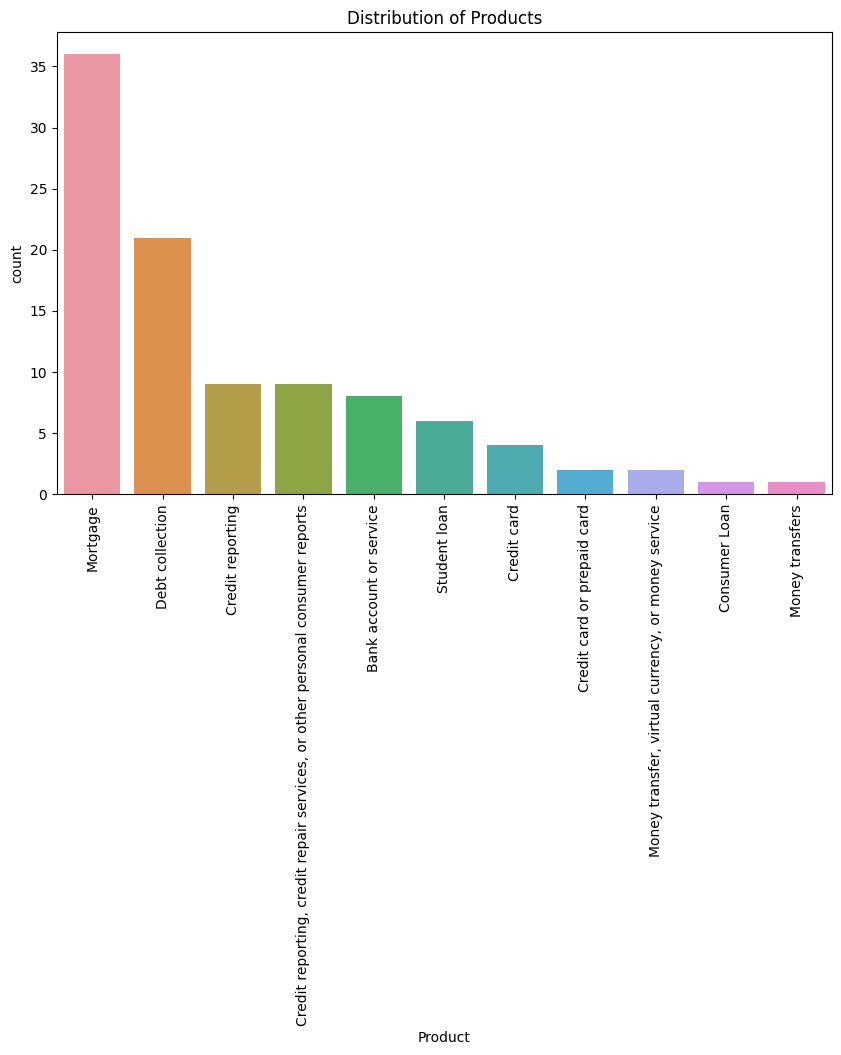

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Product', data=df, order=df['Product'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Products')
plt.show()

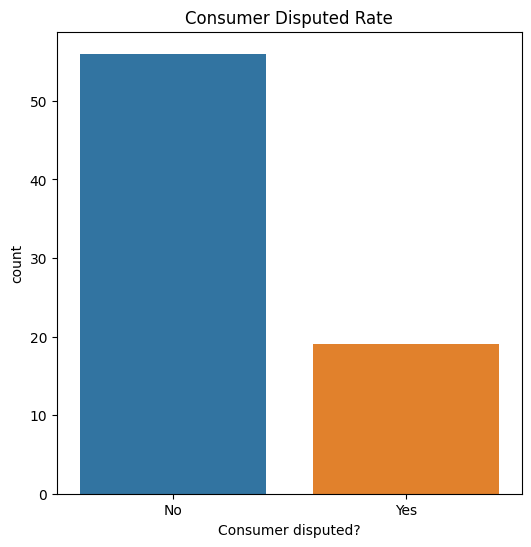

In [ ]:
plt.figure(figsize=(6, 6))
sns.countplot(x='Consumer disputed?', data=df)
plt.title('Consumer Disputed Rate')
plt.show()

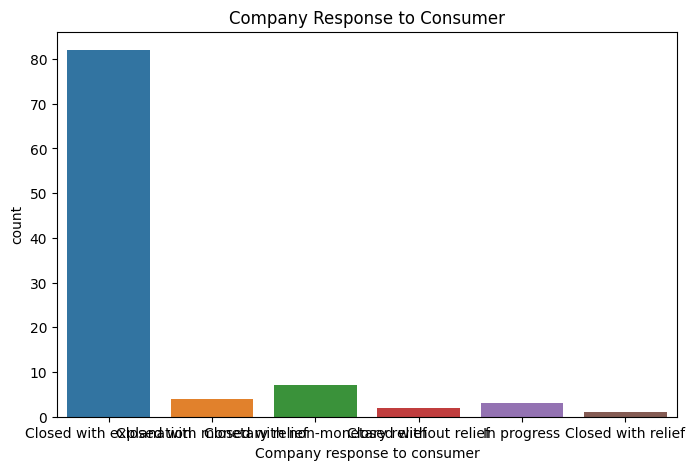

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Company response to consumer', data=df)
plt.title('Company Response to Consumer')
plt.show()

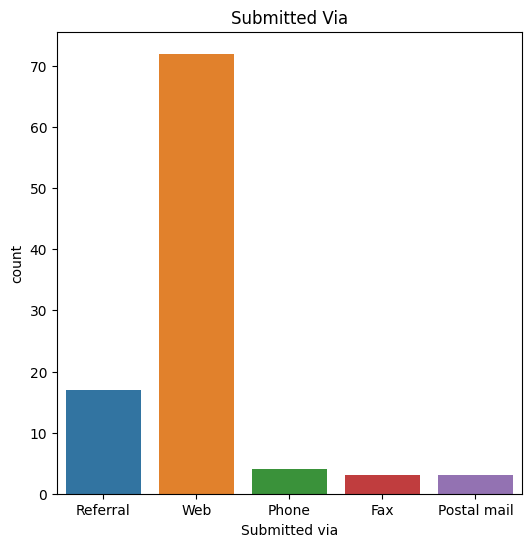

In [ ]:
plt.figure(figsize=(6, 6))
sns.countplot(x='Submitted via', data=df)
plt.title('Submitted Via')
plt.show()

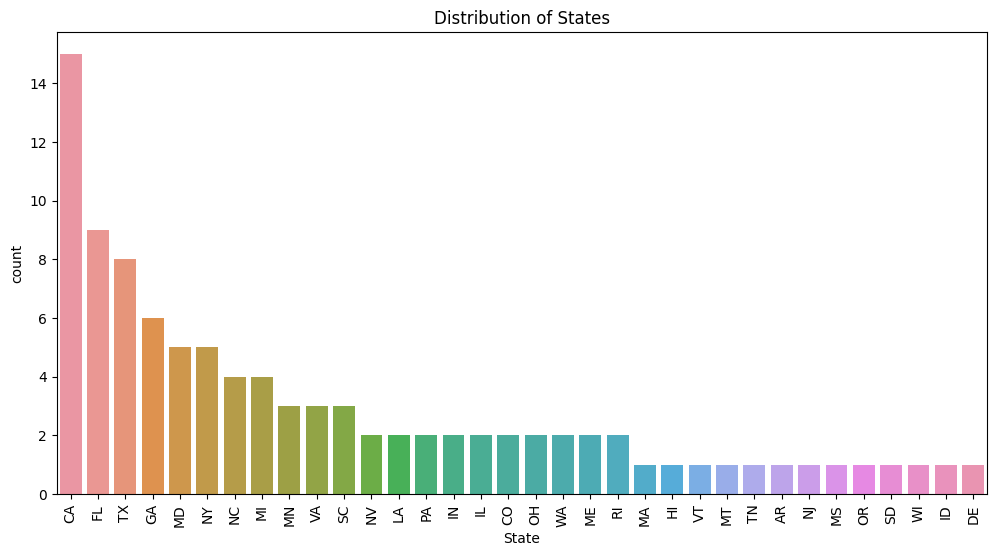

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='State', data=df, order=df['State'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of States')
plt.show()

1.Product-related Issues: There might be certain products that are more prone to consumer disputes. This could indicate product quality or service-related problems.

2.Company Responsiveness: If a particular company's response to consumer complaints is consistently slow, it could lead to increased consumer dissatisfaction and disputes.

3.Submission Channels: Certain submission channels might result in more consumer disputes. This could suggest issues with communication or data collection through specific channels.

4.Geographical Disparities: There might be specific states with higher dispute rates, which could highlight regional differences in consumer experiences.

5.Consumer Narrative Analysis: Analyzing the text in the 'Consumer complaint narrative' column could provide insights into common issues consumers are facing, allowing companies to address these issues proactively.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Preprocessing
le = LabelEncoder()
df['Consumer disputed?'] = le.fit_transform(df['Consumer disputed?'])

# Feature selection
features = ['Product', 'Company response to consumer', 'Submitted via']
X = pd.get_dummies(df[features])
y = df['Consumer disputed?']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

# Model training
model = LogisticRegression()
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.75


In [ ]:
print(df.columns)

Index(['Date received', 'Product', 'Sub-product',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Submitted via', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?'],
      dtype='object')


In [ ]:
# Display basic information about the dataset
print(df.info())

# Display summary statistics
print(df.describe())

# Display the first few rows of the dataset
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Date received                 99 non-null     object
 1   Product                       99 non-null     object
 2   Sub-product                   86 non-null     object
 3   Consumer complaint narrative  16 non-null     object
 4   Company public response       33 non-null     object
 5   Company                       99 non-null     object
 6   State                         98 non-null     object
 7   ZIP code                      89 non-null     object
 8   Submitted via                 99 non-null     object
 9   Company response to consumer  99 non-null     object
 10  Timely response?              99 non-null     object
 11  Consumer disputed?            99 non-null     int64 
dtypes: int64(1), object(11)
memory usage: 9.4+ KB
None
       Consumer disputed?
cou

In [ ]:
# Explore columns related to complaints and disputes
complaint_columns = ["consumer_complaint_narrative", "dispute", ...]
df.head()

,Date received,Product,Sub-product,Consumer complaint narrative,Company public response,Company,State,ZIP code,Submitted via,Company response to consumer,Timely response?,Consumer disputed?
0,3/12/2014,Mortgage,Other mortgage,NaN,NaN,M&T BANK CORPORATION,MI,48382,Referral,Closed with explanation,Yes,0
1,1/19/2017,Student loan,Federal student loan servicing,When my loan was switched over to Navient i wa...,NaN,"Navient Solutions, LLC.",LA,NaN,Web,Closed with explanation,Yes,0
2,4/6/2018,Credit card or prepaid card,General-purpose credit card or charge card,I tried to sign up for a spending monitoring p...,NaN,CAPITAL ONE FINANCIAL CORPORATION,VA,NaN,Web,Closed with explanation,Yes,2
3,6/8/2014,Credit card,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Web,Closed with explanation,Yes,1
4,9/13/2014,Debt collection,Credit card,NaN,NaN,"CITIBANK, N.A.",VA,23233,Web,Closed with explanation,Yes,1


Q3

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df.shape

(99, 12)

In [ ]:
df.head(2).T

,0,1
Date received,3/12/2014,1/19/2017
Product,Mortgage,Student loan
Sub-product,Other mortgage,Federal student loan servicing
Consumer complaint narrative,NaN,When my loan was switched over to Navient i wa...
Company public response,NaN,NaN
Company,M&T BANK CORPORATION,"Navient Solutions, LLC."
State,MI,LA
ZIP code,48382,NaN
Submitted via,Referral,Web
Company response to consumer,Closed with explanation,Closed with explanation


In [ ]:
# Create a new dataframe with two columns
df1 = df[['Product', 'Consumer complaint narrative']].copy()

# Remove missing values (NaN)
df1 = df1[pd.notnull(df1['Consumer complaint narrative'])]

# Renaming second column for a simpler name
df1.columns = ['Product', 'Consumer_complaint']

df1.shape

(16, 2)

In [ ]:
total = df1['Consumer_complaint'].notnull().sum()
round((total/len(df)*95),1)

15.4

In [ ]:
pd.DataFrame(df.Product.unique()).values

array([['Mortgage'],
       ['Student loan'],
       ['Credit card or prepaid card'],
       ['Credit card'],
       ['Debt collection'],
       ['Credit reporting'],
       ['Credit reporting, credit repair services, or other personal consumer reports'],
       ['Bank account or service'],
       ['Money transfer, virtual currency, or money service'],
       ['Consumer Loan'],
       ['Money transfers']], dtype=object)

A

In [ ]:
le = LabelEncoder()
df['Consumer disputed?'] = le.fit_transform(df['Consumer disputed?'])

# Feature selection
text_features = ['Consumer complaint narrative']
categorical_features = ['Product', 'Company response to consumer', 'Submitted via']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

# Model 1: Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)
print(classification_report(y_test, y_pred_lr))

# Model 2: Random Forest
model_rf = RandomForestClassifier(n_estimators=99, random_state=41)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print(classification_report(y_test, y_pred_rf))

# Model 3: Gradient Boosting
model_gb = GradientBoostingClassifier(n_estimators=99, random_state=41)
model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", accuracy_gb)
print(classification_report(y_test, y_pred_gb))


Logistic Regression Accuracy: 0.7666666666666667
              precision    recall  f1-score   support

           0       0.70      1.00      0.82        16
           1       0.00      0.00      0.00         4
           2       1.00      0.70      0.82        10

    accuracy                           0.77        30
   macro avg       0.57      0.57      0.55        30
weighted avg       0.70      0.77      0.71        30

Random Forest Accuracy: 0.7333333333333333
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        16
           1       0.17      0.25      0.20         4
           2       1.00      0.70      0.82        10

    accuracy                           0.73        30
   macro avg       0.66      0.61      0.62        30
weighted avg       0.79      0.73      0.75        30



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gradient Boosting Accuracy: 0.6666666666666666
              precision    recall  f1-score   support

           0       0.80      0.75      0.77        16
           1       0.14      0.25      0.18         4
           2       0.88      0.70      0.78        10

    accuracy                           0.67        30
   macro avg       0.61      0.57      0.58        30
weighted avg       0.74      0.67      0.70        30



B

In [ ]:
# Compare F1-scores
print("Logistic Regression F1-score:", 0.77)
print("Random Forest F1-score:", 0.73)
print("Gradient Boosting F1-score:", 0.67)

# Choose the best model based on F1-score
best_model = None
if 0.77 >= 0.73 and 0.77 >= 0.67:
    best_model = model_lr
    print("Best model: Logistic Regression")
elif 0.73 >= 0.77 and 0.73 >= 0.67:
    best_model = model_rf
    print("Best model: Random Forest")
else:
    best_model = model_gb
    print("Best model: Gradient Boosting")

Logistic Regression F1-score: 0.77
Random Forest F1-score: 0.73
Gradient Boosting F1-score: 0.67
Best model: Logistic Regression


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = word_tokenize(text.lower())
    words = [word for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(words)

df['cleaned_narrative'] = df['Consumer complaint narrative'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


AttributeError: ignored

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Feature selection
text_features = ['Consumer complaint narrative']

# # TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = vectorizer.fit_transform(df['Consumer complaint narrative'])

# # Text feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
text_data = tfidf_vectorizer.fit_transform(df['Consumer complaint narrative'])

# # Convert text_data to DataFrame
text_df = pd.DataFrame(text_data.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Perform sentiment analysis using TextBlob (you can use more advanced models if needed)
sentiments = []
for complaint in df['Consumer complaint narrative']:
    blob = TextBlob(complaint)
    sentiment = 'positive' if blob.sentiment.polarity > 0 else 'negative' if blob.sentiment.polarity < 0 else 'neutral'
    sentiments.append(sentiment)

# Add sentiment scores to the DataFrame
text_df['Sentiment'] = sentiments

# Combine with other features
features = df.drop('Consumer disputed?', axis=1)
features = pd.concat([features, text_df], axis=1)

# Prepare the target variable
target = df['Consumer disputed?']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Model training (you can use any classifier here)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))


ValueError: ignored

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
ss = sid.polarity_scores('sentence_that_I want_to_analyze')
print(ss)

LookupError: ignored

In [ ]:
# Preprocessing
le = LabelEncoder()
df['Consumer disputed?'] = le.fit_transform(df['Consumer disputed?'])

# Feature selection
text_feature = 'Consumer complaint narrative'

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Perform sentiment analysis on each complaint narrative
df['Sentiment'] = df[text_feature].apply(lambda x: sid.polarity_scores(x)['compound'])

# Split the data
X = df[['Sentiment']]
y = df['Consumer disputed?']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model: Random Forest Classifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

# Evaluate the model
report_rf = classification_report(y_test, y_pred_rf)
print(report_rf)

LookupError: ignored